<a href="https://colab.research.google.com/github/Avasa29/Capstone-Project-II--Yes-Bank-Stock-Price-pridiction-/blob/main/Capstone_I_Yes_Bank_Stock_price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Context/Problem Statement
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models or
any other predictive models can do justice to such situations. This dataset has monthly stock
prices of the bank since its inception and includes closing, starting, highest, and lowest stock
prices of every month. The main objective is to predict the stock’s closing price of the
month.

What is stock?

A Stock or share (also known as a company’s “equity”) is a financial instrument that represents ownership in a company.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices of the bank since its inception. It contains the following features:

Date: It denotes date of investment done (in our case we have month and year).
Open: Open means the price at which a stock started trading when the opening bell rang.

High: High refer to the maximum prices in a given time period.

Low: Low refer to the minimum prices in a given time period.

Close: Close refers to the price of an individual stock when the stock exchange closed for the day.

(I) Import required Liabraries


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
     

(II) Mounting Drive & Data Base

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Capstone Project II/data_YesBank_StockPrices.csv'
data_yesbank = pd.read_csv(file_path)

(III) Dataset understanding

In [ ]:
#Take a look at data
print(data_yesbank.head())

print(data_yesbank.tail())

     Date   Open   High    Low  Close     OHL
0  Jul-05  13.00  14.00  11.25  12.46  25.726
1  Aug-05  12.58  14.88  12.55  13.42  26.578
2  Sep-05  13.48  14.87  12.27  13.30  27.166
3  Oct-05  13.20  14.47  12.40  12.99  26.622
4  Nov-05  13.35  13.88  12.88  13.41  26.854
       Date   Open   High    Low  Close     OHL
180  Jul-20  25.60  28.30  11.10  11.95  41.190
181  Aug-20  12.00  17.16  11.85  14.37  27.456
182  Sep-20  14.30  15.34  12.75  13.15  28.016
183  Oct-20  13.30  14.01  12.11  12.42  26.118
184  Nov-20  12.41  14.90  12.21  14.67  27.132


* Dataset has Open, High,Low,Close price of the stock in every month.
* Dataset available form Jul'2005 to Nov'2020.
* For Analysis, select only Closing price.

In [ ]:
data_yesbank.shape

(185, 5)

In [ ]:
data_yesbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


* We have total 185 entries
* Non-null values
* String Object type data column


In [25]:
#convert string object to datetime object
from datetime import datetime
data_yesbank['Date'] = data_yesbank['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))
data_yesbank.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [ ]:
#Data after datetime object
data_yesbank.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [19]:
#Summury of Data set
data_yesbank.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [9]:
#Missing Values
data_yesbank.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [10]:
#find Duplication of data
len(data_yesbank[data_yesbank.duplicated()])

0

In [ ]:
data_yesbank.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

There are 0 missing values in this data set.

In [ ]:
data_yesbank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

*Dataset Uderstanding finished and ready for EDA

(IV) EDA

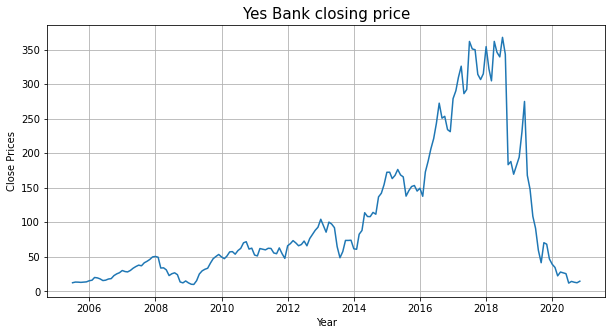

In [27]:
#plotting close price vs date
plt.figure(figsize=(10,5))
plt.grid(True)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Close Prices', fontsize=10)
plt.plot(data_yesbank['Date'], data_yesbank['Close'])
plt.title('Yes Bank closing price', fontsize=15)
plt.show()

Above trend is stock price decreasing largely due to Rana Kapoor's case after 2018.

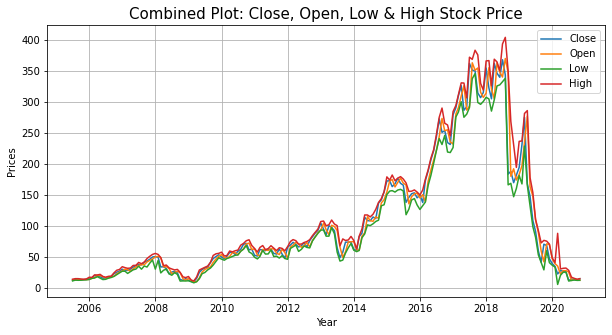

In [28]:
# Combined Line Plot for all features with respect to date.
plt.figure(figsize=(10,5))
plt.plot(data_yesbank['Date'], data_yesbank['Close'])
plt.plot(data_yesbank['Date'], data_yesbank['Open'])
plt.plot(data_yesbank['Date'], data_yesbank['Low'])
plt.plot(data_yesbank['Date'], data_yesbank['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Prices', fontsize=10)
plt.grid()
     

-All the prices shows almost similar trends with each other.

-Which means that this features may be strongly correlated with each other.

In [29]:
#make a independent Numeric variable
numeric_features = data_yesbank.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

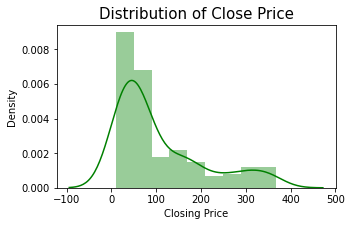

In [32]:
#distribution plot of Close price to look for normal distribution
plt.figure(figsize=(5,3))
sns.distplot(data_yesbank['Close'],color='G')
plt.title('Distribution of Close Price', fontsize=15)
plt.xlabel('Closing Price', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()
     

-Distribution plot of closing price is right skewed.

-To make it normal distribution apply log transformation.

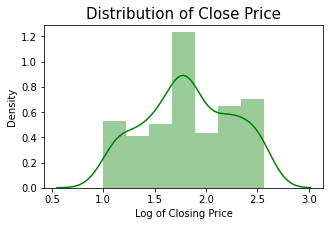

In [33]:
#distribution plot of Close price by applying log transformation
plt.figure(figsize=(5,3))
sns.distplot(np.log10(data_yesbank['Close']),color='G')
plt.title('Distribution of Close Price', fontsize=15)
plt.xlabel('Log of Closing Price', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

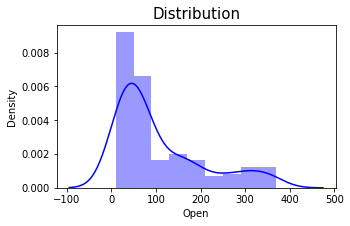

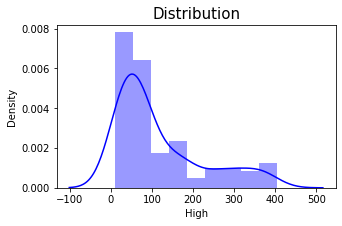

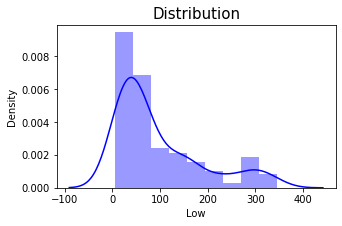

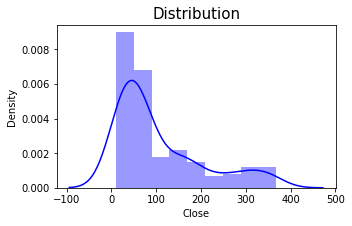

In [35]:
#Plotting distribution for each of numerical features.
for col in numeric_features:
    plt.figure(figsize=(5,3))
    sns.distplot(data_yesbank[col], color='B')
    plt.title("Distribution", fontsize=15)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density', fontsize=10)
plt.show()
     

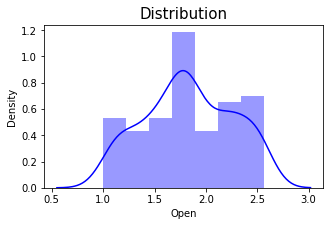

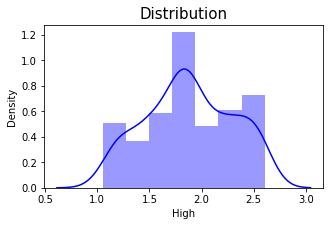

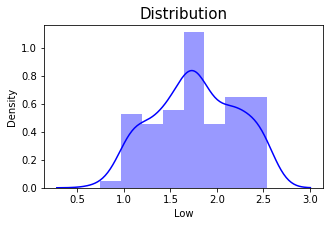

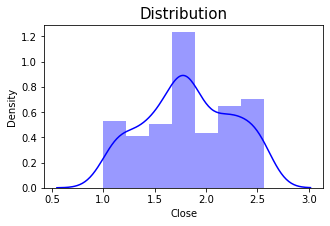

In [36]:
#Plotting distribution for each of numerical features by applying log transformation
for col in numeric_features:
    plt.figure(figsize=(5,3))
    sns.distplot(np.log10(data_yesbank[col]), color='blue')
    plt.title("Distribution", fontsize=15)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density', fontsize=10)
plt.show()

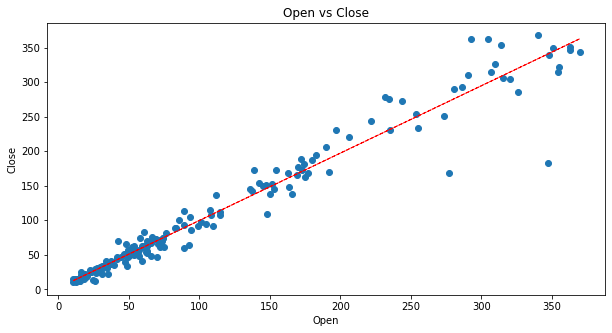

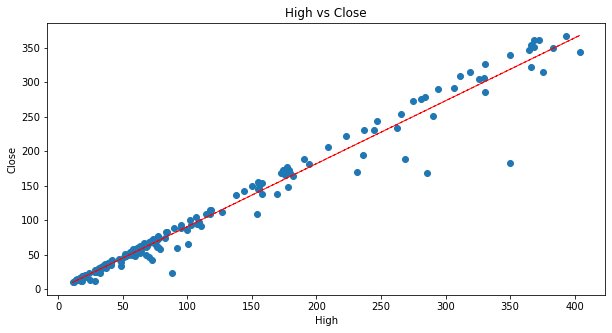

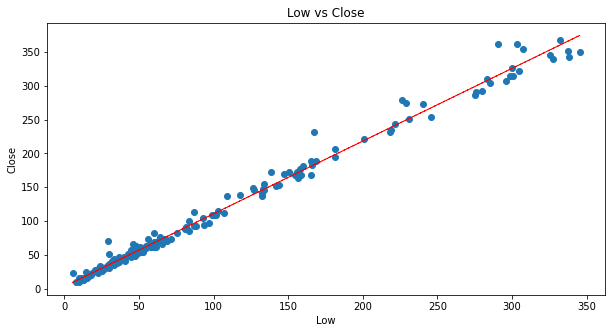

In [37]:
# scatter plot to see the relationship between dependent & independent variables
for col in data_yesbank.describe().columns[:-1]:
  fig = plt.figure(figsize=(10,5))
  ax = fig.gca()
  plt.scatter(data_yesbank[col], data_yesbank['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(data_yesbank[col], data_yesbank['Close'], 1)
  y_hat = np.poly1d(z)(data_yesbank[col])
  plt.plot(data_yesbank[col], y_hat, "r--", lw=1)
  plt.show()

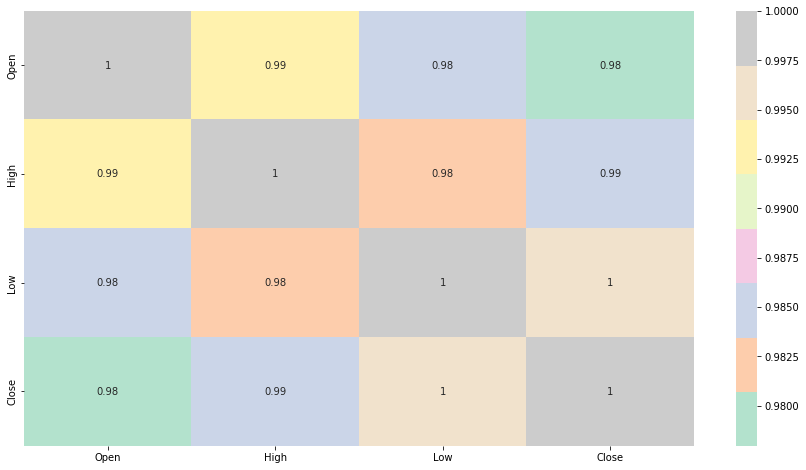

In [40]:
#Corelation heat map
plt.figure(figsize=(15,8))
correlation = data_yesbank.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Pastel2')

-Variables are high corelated

(V) Transforming & Spliting the data

In [41]:
# Creating a new feature based on average of other features in the dataset
data_yesbank.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


X = Independant Variable values

y = Dependent Variable values

In [42]:
#Splitting our data into Dependent and Independent Variables
X = data_yesbank[['Open', 'High', 'Low']]
y = data_yesbank['Close']

-Data must be normal distributed. So applying narmalization on X & y.

(VI) Normalisation 

In [43]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

-Train(80%) & Test(20%) Split

In [44]:
# Spliting Data into Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)     

In [45]:
#checking shape of training dataset.
X_train.shape   

(148, 3)

In [46]:
#checking shape of testing dataset.
X_test.shape     

(37, 3)

(VII) Model Building

1- Linear Regreassion 

In [47]:
#initialize and fit linear regression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [48]:
#train accuracy of linear regression model
round(LR.score(X_train,y_train), 3)

0.815

In [49]:
#test accuracy of linear regression model
round(LR.score(X_test,y_test), 3)

0.823

In [50]:
#prediction of test data.
y_pred = LR.predict(X_test)

Evaluation Metrics of Linear Regression:-

In [51]:
# Test Performance of linear regression model
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


Linear Regression: Actual Vs. Predicted

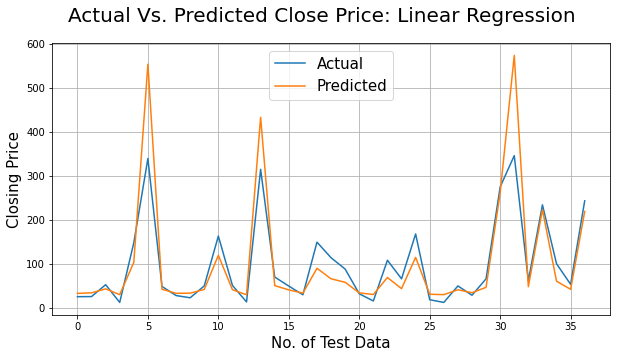

In [53]:
# Actual Price vs. Predicted Price for Linear Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=20)
plt.legend(['Actual','Predicted'], fontsize=15)
plt.xlabel('No. of Test Data', fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.grid()

2- Lasso Regression 

In [55]:
#fitting data into Lasso Regression
la_reg = Lasso(alpha=0.005,max_iter=3000)
la_reg_model = la_reg.fit(X_train,y_train)

In [56]:
#accuracy of lasso regression model
round(la_reg.score(X_train,y_train),3)

0.814

In [57]:
#prediction of test data.
y_pred_lasso = la_reg.predict(X_test)

Evaluation Metrics of Lasso Regression:-

In [58]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 3))

MSE : 0.032
RMSE : 0.179
MAE : 0.152
MAPE : 0.096
R2 : 0.82


Lasso Regression: Actual Vs. Predicted

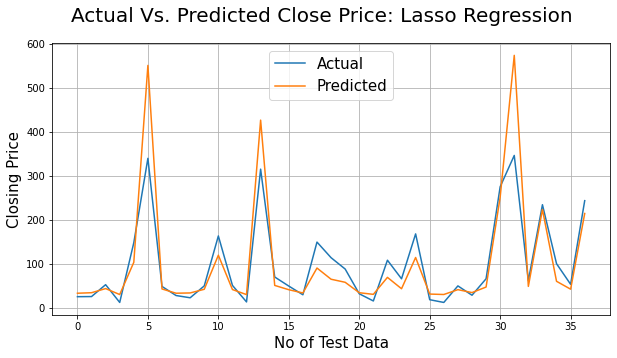

In [59]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=20)
plt.legend(['Actual','Predicted'], fontsize=15)
plt.xlabel('No. of Test Data', fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.grid()

Cross Validation on Lasso Regression

In [60]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [61]:
# Hyper-Parameter Tuning for Lasso Regression
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [62]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 3))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,3))

The best fit alpha value is found out to be : 0.001
The negative mean squared error for is:  -0.003


In [63]:
#prediction of test data.
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

Evaluation Metrics of Lasso Regression after Validation:-

In [64]:

# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 3))

MSE : 0.032
RMSE : 0.18
MAE : 0.153
MAPE : 0.097
R2 : 0.819


Lasso Regression After Validation: Actual Vs. Predicted

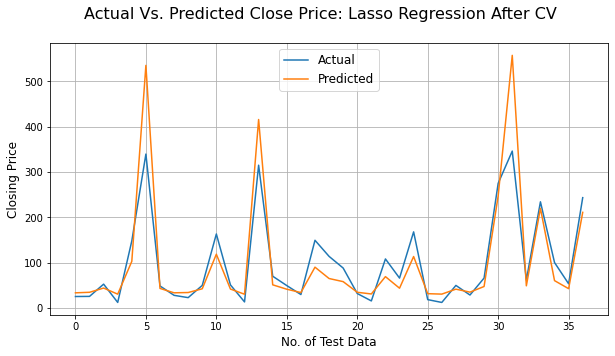

In [65]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No. of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

3- Ridge Regression

In [67]:
#fitting data into Ridge Regression
ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [68]:
#accuracy of lasso regression model
round(ridge_reg.score(X_train,y_train),3)

0.815

In [69]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [70]:
# Test Performance of ridge regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


Ridge Regression: Actual Vs. Predicted

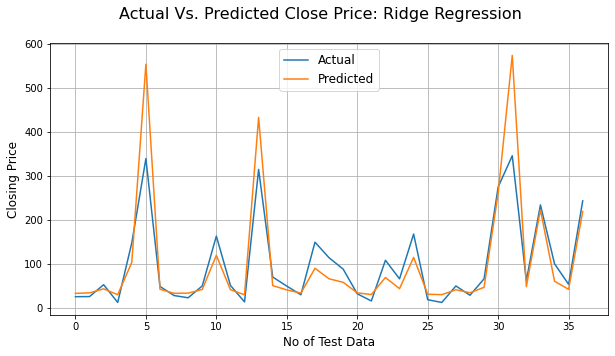

In [71]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

Cross Validation on Ridge Regression

In [75]:
# Hyper-Parameter Tuning for Lasso Regression
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [76]:
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [77]:
print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 10
The negative mean squared error for is:  -0.035


In [78]:
#prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(X_test)

Evaluation Metrics of Ridge Regression after Validation:-

In [80]:
#Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))

MSE : 0.033
RMSE : 0.18
MAE : 0.153
MAPE : 0.097
R2 : 0.817


Ridge Regression After Validation: Actual Vs. Predicted

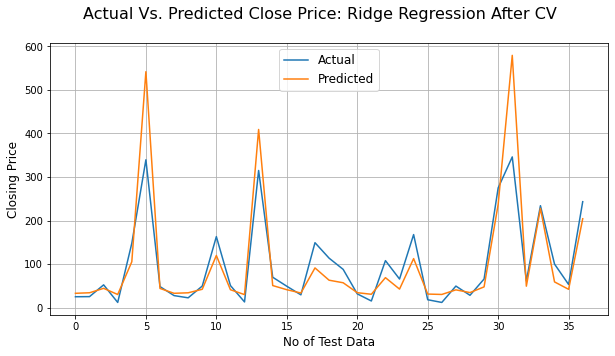

In [81]:
#Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()
     

4- Elastic Net

In [83]:
#fitting data into Elastic Net
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)

In [84]:
#accuracy of lasso regression model
round(elastic.score(X_train,y_train),3)

0.796

In [86]:
#prediction of test data.
y_pred_elastic = elastic.predict(X_test)

In [88]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 3))

MSE : 0.036
RMSE : 0.191
MAE : 0.157
MAPE : 0.102
R2 : 0.796


Elastic Net: Actual Vs. Predicted

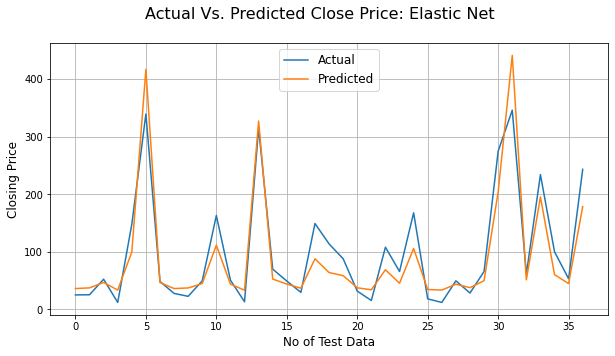

In [89]:
#Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid() 

Cross Validation on Elastic Net

In [90]:
#Hyper-Parameter Tuning for Elastic Net
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)

In [91]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [92]:
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 0.3
The negative mean squared error for is:  -0.003


In [93]:
#prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

Evaluation Metrics of Elastic Net after Validation:-

In [94]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 3))

MSE : 0.032
RMSE : 0.18
MAE : 0.153
MAPE : 0.097
R2 : 0.819


Elastic Net After Validation: Actual Vs. Predicted

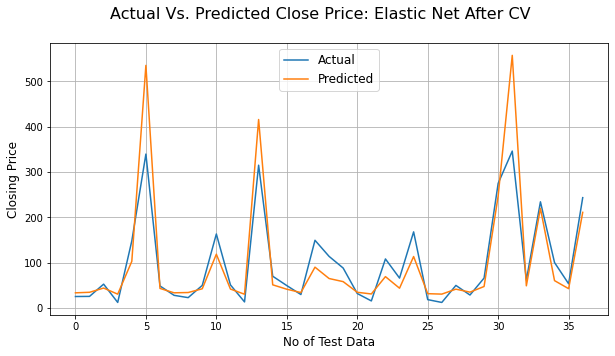

In [95]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

(VIII) Evaluation Matrics Comparison

In [96]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)
  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 3)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
    MAE = round(mean_absolute_error(y_test, y_pred),3)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),3)
    R2 = round(r2_score(y_test, y_pred), 3)

    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2

    #to get values in next rows for next model
    i=i+1
    
  #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)
    
  return df

In [97]:
all_model = [LR, la_reg, ridge_reg, elastic]

In [98]:
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, all_model)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
0,LinearRegression,0.032,0.178,0.151,0.095,0.823
1,Ridge,0.032,0.178,0.151,0.095,0.823
2,Lasso,0.032,0.179,0.152,0.096,0.820
3,ElasticNet,0.036,0.191,0.157,0.102,0.796


#Conclusion

* We got a maximum accuracy of 82%.

* Linear, lasso and ridge regression show almost same R squared values.

* Whereas elastic net model shows lowest R squared value and high MSE, RMSE, MAE & MAPE.

* Close, Open and high price of stock are strongly correlated with each other.